In [402]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np
import glob

from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
import scipy.interpolate as inter
import math
def sin_model(x,A,phi,omega,b):
    return A* np.sin(omega*x+phi)+b
def line_model(x,m,b):
    return m*x+b

c2='red' 
c1='blue' 
n=44
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
def birefringence(phi,d,lam,theta):
    top= phi*lam
    bottom= 2* np.pi*d*np.sin(theta)**2
    return top/bottom

array([0.99636971, 0.72887993])

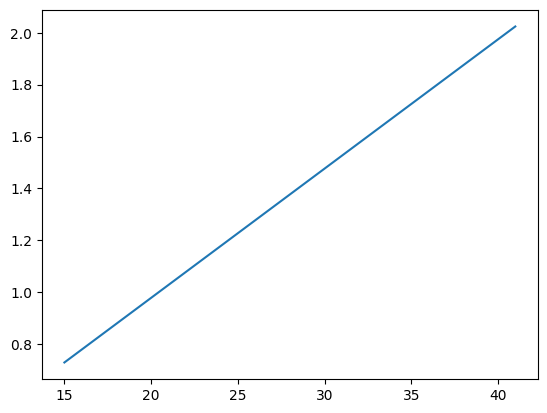

In [422]:
xl,yl=[],[]
filenames=glob.glob('Temp*/*.mat')
for i in filenames:
    xl.append(io.loadmat(i)["Tempture"][0])
    yl.append(io.loadmat(i)["Voltage_O"][0])

xfine= np.linspace(0,max(xl[0]),10000)   

p1,c1 = opt.curve_fit(line_model, xl[1], yl[1],p0=(1,0))
plt.plot(20*xfine+15,line_model(xfine,*p1))
p1

In [417]:
yl[1]

array([0.73768 , 0.766887, 0.800514, 0.830637, 0.856059, 0.890091,
       0.919897, 0.945705, 0.975337, 1.009634, 1.039379, 1.06509 ,
       1.098812, 1.129003, 1.158826, 1.188893, 1.218322, 1.248604,
       1.278289, 1.308416, 1.337852, 1.362204, 1.392325, 1.422127,
       1.457915, 1.481771, 1.517966, 1.541218, 1.575658, 1.600475,
       1.637587, 1.667683, 1.69693 , 1.727251, 1.756999, 1.787157,
       1.816475, 1.844855, 1.874601, 1.906746, 1.934007, 1.966099,
       1.996126, 2.01799 ])

In [400]:
for i in filenames:
    xl.append(io.loadmat(i)["Tempture"][0])
    yl.append(io.loadmat(i)["Voltage_O"][0])

In [423]:
xl,yl=[],[]
filenames=["20c100-5000.mat","20-5c100-5000.mat","21c100-5000.mat","21-5c100-5000.mat","22c100-5000.mat","22-5c100-5000.mat","23c100-5000.mat","23-5c100-5000.mat","24c100-5000.mat","24-5c100-5000.mat","25-c100-5000.mat","25-5-c100-5000.mat","26-c100-5000.mat","26-5-c100-5000.mat","27-c100-5000.mat","27-5-c100-5000.mat","28-c100-5000.mat","28-5-c100-5000.mat","29-c100-5000.mat","29-5-c100-5000.mat","30-c100-5000.mat","30-5-c100-5000.mat","31-c100-5000.mat","31-5-c100-5000.mat","32-c100-5000.mat","32-5-c100-5000.mat","33-c100-5000.mat","33-5-c100-5000.mat","34-c100-5000.mat","34-5-c100-5000.mat","35-c100-5000.mat","35-5-c100-5000.mat","36-c100-5000.mat","36-5-c100-5000.mat","37-c100-5000.mat","37-5-c100-5000.mat","38-c100-5000.mat","38-5-c100-5000.mat","39-c100-5000.mat","39-5-c100-5000.mat","40-c100-5000.mat"]
for i in filenames:
    xl.append(io.loadmat("DATA1/"+i)["VP"][0])
    yl.append(io.loadmat("DATA1/"+i)["Voltage_O"][0])

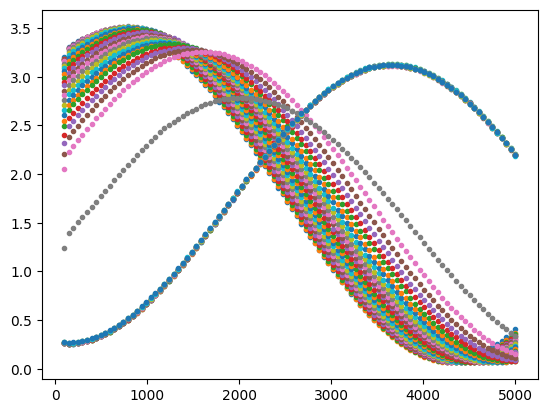

In [424]:
for x,y in zip(xl,yl):
    plt.plot(x,y,".")

In [426]:
arange= np.arange(20,40.5,.5)
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]

crange=np.arange(1,len(xl)+1)
for x,y,i in zip(arange,yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,0,1/8000,1.5))
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))

ValueError: RGBA sequence should have length 3 or 4

In [314]:
pl=np.array(pl)
cl=np.array(cl)

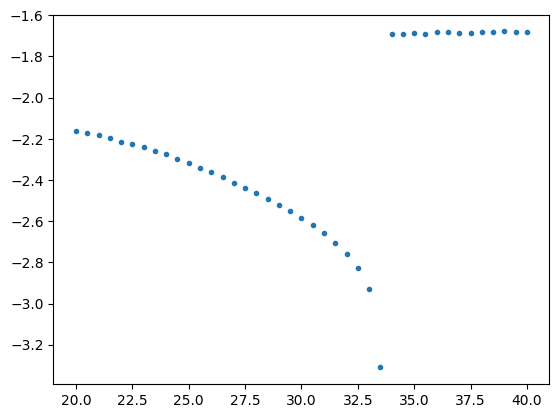

In [315]:
trange=np.arange(20,40.5,.5)
plt.plot(trange,pl.T[1],".")

In [316]:
xl,yl=[],[]
filenames=glob.glob('poc0/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][5:6])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

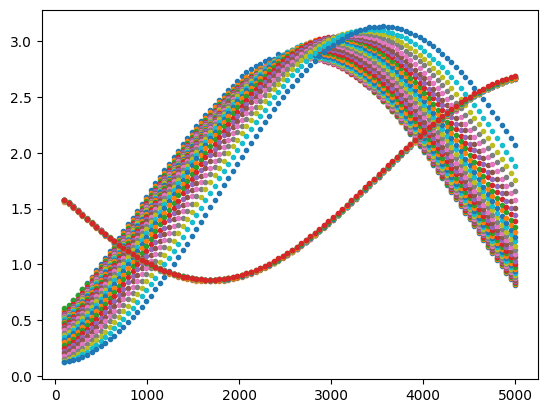

In [317]:
for x,y in zip(xl,yl):
    plt.plot(x,y,".")

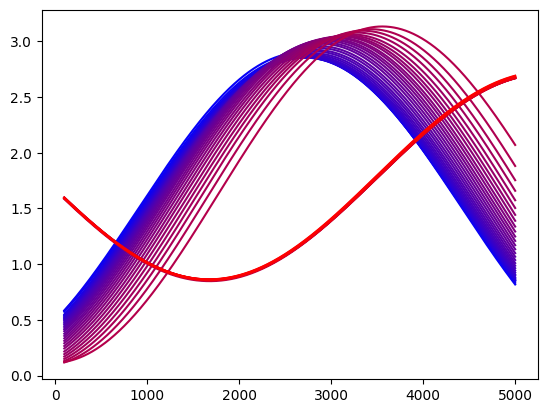

In [318]:
arange= np.arange(20,40.5,.5)
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,0,1/8000,1.5))
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))

In [319]:
len(pl)

44

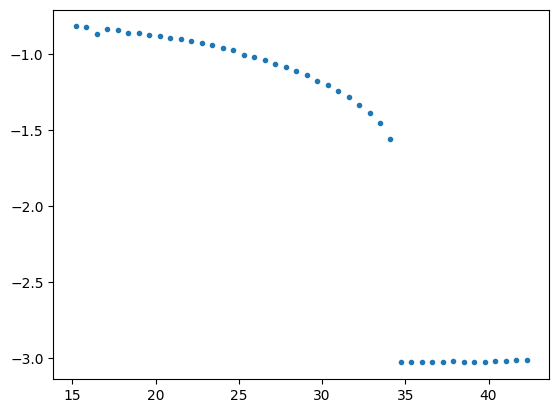

In [320]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1],".")

In [383]:
xl,yl=[],[]
filenames=glob.glob('Poc45/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][6:8] ) )
    except: 
        return(int(x.split()[0][6:7])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

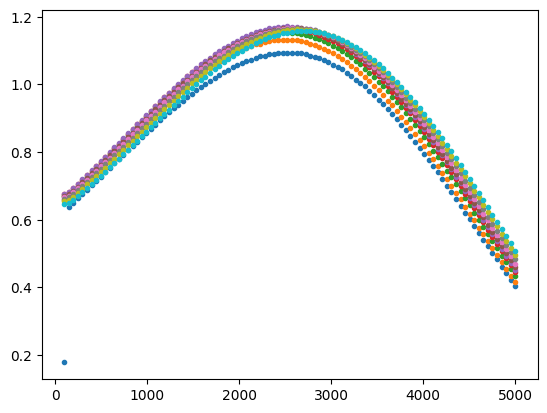

In [384]:
for x,y in zip(xl[:10],yl[:10]):
    plt.plot(x,y,".")


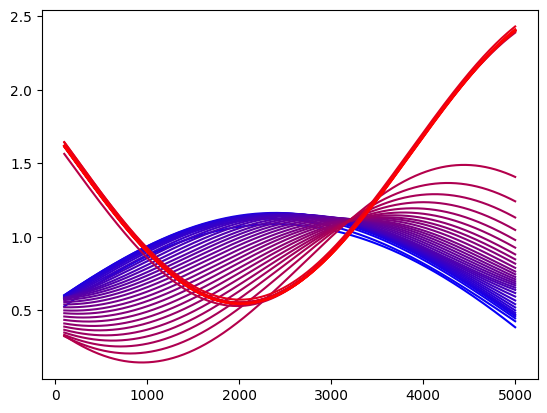

In [385]:

xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,np.pi/2,1/8000,1.5))
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))


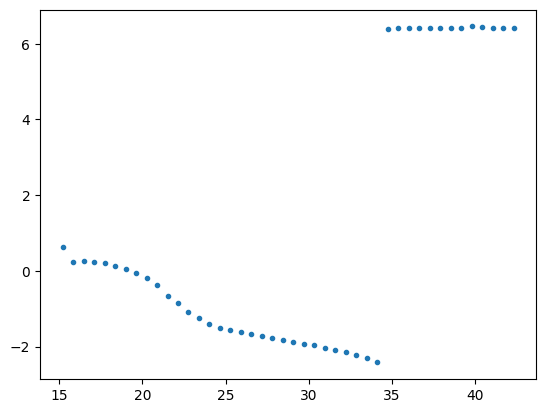

In [386]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1],".")

In [387]:
xl,yl=[],[]
filenames=glob.glob('poc134/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][6:8] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

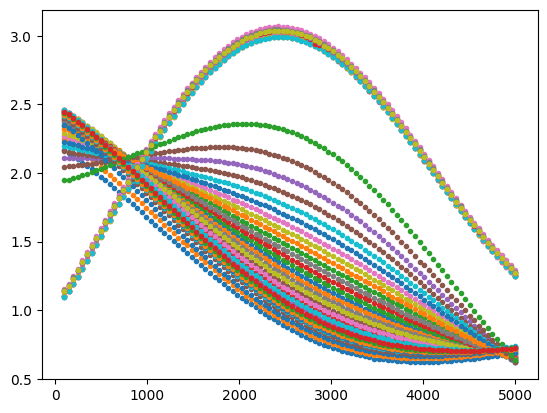

In [388]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")


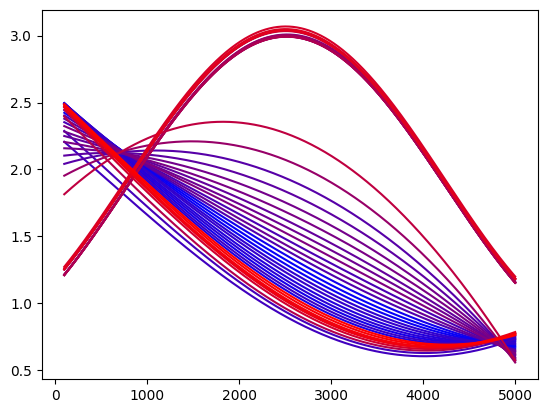

In [389]:
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,5*np.pi/4,1/8000,1.5),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))


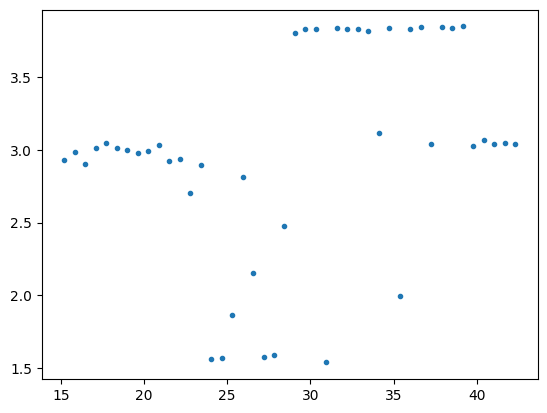

In [390]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1],".")

In [377]:
xl,yl=[],[]
filenames=glob.glob('poc180/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

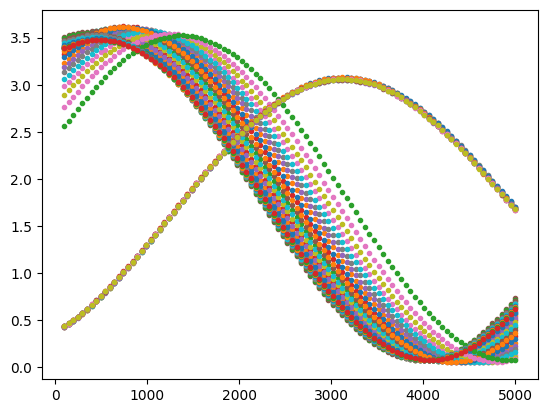

In [378]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")
   

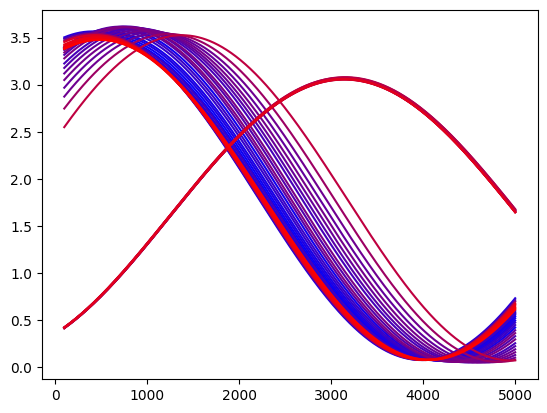

In [379]:
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,7*np.pi/4,1/8000,1.5),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))


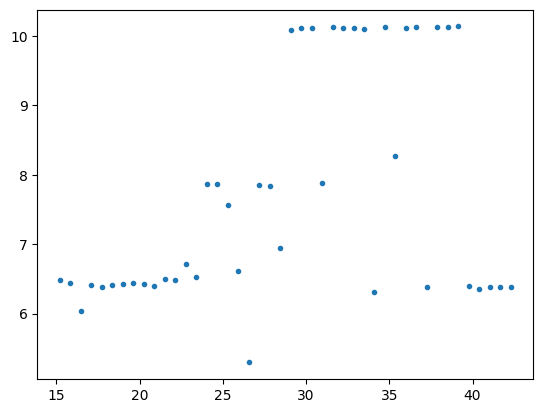

In [369]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1],".")